<a href="https://colab.research.google.com/github/newstage75/ML_study/blob/master/%E6%9C%80%E7%9F%ADPytorch/%EF%BC%96%E7%AB%A0%EF%BC%92%E5%80%A4%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#６章２値分類

In [1]:
# 必要ライブラリの導入
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [2]:
# 必要ライブラリのインポート
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [3]:
# torch関連ライブラリのインポート
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [4]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

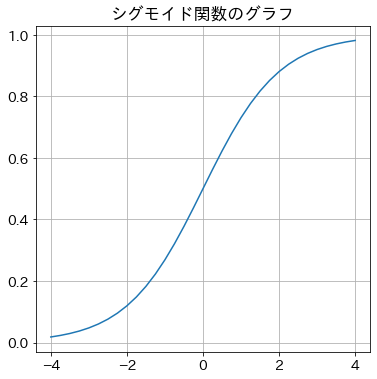

In [5]:
# シグモイド関数の利用
x_np = np.arange(-4, 4.1, 0.25)

#xをテンソル形式に変換する
x = torch.tensor(x_np).float()

#yの値計算
y = torch.sigmoid(x)

#グラフ描画
plt.title('シグモイド関数のグラフ')
plt.plot(x.data, y.data)
plt.show()

In [7]:
#学習データのじゅんび 

#ライブラリのインポート
from sklearn.datasets import load_iris

iris = load_iris()

x_org, y_org = iris.data, iris.target

print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [8]:
#データの絞り込み
x_data = iris.data[:100,:2]
y_data = iris.target[:100]

#結果確認
print('対象データ', x_data.shape, y_data.shape)

対象データ (100, 2) (100,)


In [9]:
#訓練データ・検証データの分割

#元データサイズ
print(x_data.shape, y_data.shape)

#訓練データ、検証データに分割（シャッフルも同時に実施）
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 2) (100,)
(70, 2) (30, 2) (70,) (30,)


In [17]:
print(x_data[:5,:])
print(y_data[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[0 0 0 0 0]


In [16]:
print(x_train[:5,:])
print(y_train[:5])

[[5.1 3.7]
 [5.5 2.6]
 [5.5 4.2]
 [5.6 2.5]
 [5.4 3. ]]
[0 1 0 1 1]


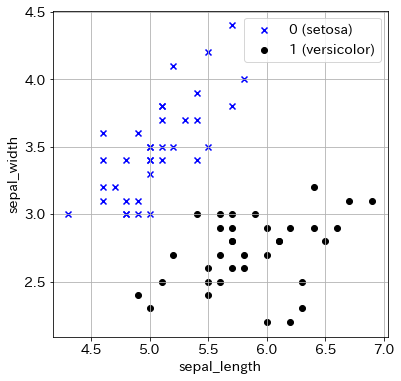

In [10]:
# 散布図の表示

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()